- Sources
  - Movies: https://editorial.rottentomatoes.com/guide/essential-2000s-movies/
  - Box Office: https://www.imdb.com
  - Content Ratings: https://www.motionpictures.org

# Initiate Connection

MySql Connection

In [15]:
import mysql.connector

connection = {'user':'root', 'password':'########',
                              'host' :'###.#.#.#',
                              'database': 'rt_movies'}
try: 
    connection = mysql.connector.connect(**connection)
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Access Denied")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("No Database")
    else:
        print(err)
else:
    cur = connection.cursor(buffered=True)

# Close DB Connection:

In [16]:
connection.close()
cur.close()

True

# Table Creation #

(COMPLETED) Movie & Genre Table:

In [ ]:
cur.execute('''CREATE TABLE Genre(
                Genre_ID INT,
                GenreName VARCHAR(150) NOT NULL,
                    CONSTRAINT Genre_Genre_ID_PK PRIMARY KEY(Genre_ID))''')

In [ ]:
cur.execute('''CREATE TABLE Movie(
                Movie_ID INT PRIMARY KEY,
                Title VARCHAR(255) NOT NULL,
                ReleaseDate DATE NOT NULL,
                Gross DECIMAL(14,2))''')

Adding Constraint name for 'Movie_ID'

In [ ]:
cur.execute('''ALTER TABLE Movie
                DROP PRIMARY KEY''')

cur.execute('''ALTER TABLE Movie
                ADD CONSTRAINT Movie_Movie_ID_PK PRIMARY KEY(Movie_ID)''')

(COMPLETED) Creating Tables


In [ ]:
cur.execute('''CREATE TABLE Actor(
                Actor_ID int,
                ActorFName VARCHAR(50) NOT NULL,
                ActorLName VARCHAR(50) NOT NULL,
                ActorCity VARCHAR(68),
                ActorState VARCHAR(16),
                ActorCountry VARCHAR(65) NOT NULL,
                ActorBDate DATE NOT NULL,
                    CONSTRAINT Actor_Actor_ID_PK PRIMARY KEY(Actor_ID))''')

cur.execute('''CREATE TABLE Director(
                Director_ID int,
                DirectorFName VARCHAR(50) NOT NULL,
                DirectorLName VARCHAR(50) NOT NULL,
                DirectorCity VARCHAR(68),
                DirectorState VARCHAR(50),
                DirectorCountry VARCHAR(65) NOT NULL,
                DirectorBDate DATE,
                    CONSTRAINT Director_Director_ID_PK PRIMARY KEY(Director_ID))''')

cur.execute('''CREATE TABLE Rating(
                Rating_ID int,
                CriticRating DECIMAL(5,2) NOT NULL,
                AudienceRating DECIMAL(5,2) NOT NULL,
                Movie_ID INT,
                    CONSTRAINT Rating_Movie_ID_FK FOREIGN KEY (Movie_ID) REFERENCES MOVIE(Movie_ID)
                    CONSTRAINT Rating_Rating_ID_PK PRIMARY KEY(Rating_ID))''')


In [ ]:
cur.execute('''DROP TABLE IF EXISTS ContentRatings''')
cur.execute('''CREATE TABLE ContentRatings(
                Cr_ID int,
                ContentRating VARCHAR(10),
                CrDescription VARCHAR(1000),
                    CONSTRAINT ContentRatings_CrID_PK PRIMARY KEY(Cr_ID))''')

(COMPLETED) Join table Creation Continued

In [ ]:
### Join Tables

cur.execute('''CREATE TABLE Movie_Director(
                Movie_ID int,
                Director_ID int,
                    CONSTRAINT Move_Director_PK PRIMARY KEY(Movie_ID, Director_ID),
                    CONSTRAINT Movie_Director_Movie_ID_FK FOREIGN KEY(Movie_ID) REFERENCES Movie(Movie_ID),
                    CONSTRAINT Movie_Director_Director_ID_FK FOREIGN KEY(Director_ID) REFERENCES Director(Director_ID))''')
cur.execute('''CREATE TABLE Movie_Actor(
                Movie_ID int,
                Actor_ID int,
                Role VARCHAR(65)NOT NULL,
                    CONSTRAINT Movie_Actor_PK PRIMARY KEY(Movie_ID, Actor_ID),
                    CONSTRAINT Movie_Actor_Movie_ID_FK FOREIGN KEY(Movie_ID) REFERENCES Movie(Movie_ID),
                    CONSTRAINT Movie_Actor_Actor_ID_FK FOREIGN KEY(Actor_ID) REFERENCES Actor(Actor_ID))''')

In [ ]:
cur.execute('''CREATE TABLE Movie_Genre(
                Movie_ID int,
                Genre_ID int,
                    CONSTRAINT Movie_Genre_PK PRIMARY KEY(Movie_ID, Genre_ID),
                    CONSTRAINT Movie_Genre_Movie_ID_FK FOREIGN KEY(Movie_ID) REFERENCES Movie(Movie_ID),
                    CONSTRAINT Movie_Genre_Genre_ID_FK FOREIGN KEY(Genre_ID) REFERENCES Genre(Genre_ID))''')

In [ ]:

cur.execute('''CREATE TABLE Movie_ContentRatings(
                Movie_ID int,
                Content_Rating int,
                    CONSTRAINT Movie_ContentRatings_PK PRIMARY KEY(Movie_ID, Content_Rating),
                    CONSTRAINT Movie_ContentRatings_Movie_ID_FK FOREIGN KEY(Movie_ID) REFERENCES Movie(Movie_ID),
                    CONSTRAINT Movie_ContentRatings_Content_Rating_FK FOREIGN KEY(Content_Rating) REFERENCES ContentRatings(Cr_ID))''')

# Data Insertion

- Actor Table (COMPLETED)

In [30]:
import pandas as panda

#read csv file
actorsinfo = panda.read_csv("C:/Users/osmat/Downloads/ActorTableInfo.csv")
actorsinfo.fillna(value='', inplace=True)


#getting rid of NaN error
actorsinfo_fix = actorsinfo.where(panda.notnull(actorsinfo), None)

#insert the data from file into Actor table in the rt_movies database
for index, row in actorsinfo.iterrows():
    try:
        insertion = '''INSERT INTO Actor(Actor_ID, ActorFName, ActorLName, ActorCity, ActorState, ActorCountry, ActorBDate)
                    VALUES(%s, %s, %s, %s, %s, %s, %s)'''
        cur.execute(insertion, (row['Actor_ID'], row['ActorFName'], row['ActorLName'], row['ActorCity'], row['ActorState'], row['ActorCountry'], row['ActorBDate']))
        #commiting data 
        connection.commit()
    except mysql.connector.Error as e:
        print(f"Error inserting {row['Actor_ID']}: {e}")

#closing
connection.close()
cur.close()

True

- Movie Table

In [ ]:
#43 & 28 & 18 & 11 & 8 has 2 directors
cur.execute('''INSERT INTO Movie(Movie_ID, Title, ReleaseDate, Gross)
                VALUES
                (50, 'Million Dollar Baby', '2004-12-15', 216763646),
                (49, 'Hot Fuzz', '2007-04-20', 80578470),
                (48,'The Host', '2007-03-09', 89433506),
                (47, 'Moulin Rouge', '2001-06-01', 184935252),
                (46, 'Man On Wire', '2008-07-25', 5258569),
                (45, 'Zodiac', '2007-03-02', 84786496),
                (44, 'Napoleon Dynamite', '2004-01-17', 46140172),
                (43, 'Little Miss Sunshine', '2006-01-20', 101059124),
                (42, 'Inglourious Basterds', '2009-08-21', 321460456),
                (41, 'Memento', '2000-09-05', 40047236),
                (40, 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan', '2006-11-03', 262552893),
                (39, 'Best In Show', '2000-09-29', 20789556),
                (38, 'There Will Be Blood', '2008-01-25', 76186873),
                (37, 'Amelie', '2001-11-02', 175183052),
                (36, 'District 9', '2009-08-14', 210888950),
                (35, 'The Hurt Locker', '2009-07-31', 49259766),
                (34, 'Minority Report', '2002-06-21', 358372926),
                (33, '4 Months, 3 Weeks and 2 Days', '2008-01-25', 10174839),
                (32, 'The Departed', '2006-10-06', 291481358),
                (31, 'Spider-Man 2', '2004-06-30', 784543400),
                (30, 'Juno', '2007-12-25', 232372830),
                (29, 'The Bourne Ultimatum', '2007-08-03', 444100035),
                (28, 'Persepolis', '2007-12-25', 22783978),
                (27, 'A Prophet', '2010-02-26', 17874044),
                (26, 'Once', '2007-05-16', 20939022),
                (25, 'Crouching Tiger, Hidden Dragon', '2000-12-22', 213978518),
                (24, 'Sideways', '2004-10-22', 109706931),
                (23, "Harry Potter and The Scorcerer's Stone", '2001-11-16', 1024583854),
                (22, 'Casino Royale', '2006-11-17', 616577552),
                (21, 'Slumdog Millionaire', '2009-01-25', 378411362),
                (20, 'Chicken Run', '2000-06-21', 224888359),
                (19, 'The Incredibles', '2004-11-05', 631688498),
                (18, 'City of God', '2003-01-17', 30680793),
                (17, 'Let The Right One In', '2008-10-24', 11227336),
                (16, 'Before Sunset', '2004-02-10', 16505440),
                (15, 'Wall-E', '2008-06-27', 527403656),
                (14, 'Brokeback Mountain', '2005-12-09', 178064141),
                (13, 'Mean Girls', '2004-04-30', 130191763),
                (12, 'The Wrestler', '2008-12-17', 44734660),
                (11, 'Up', '2009-05-29', 735102136),
                (10, 'Iron Man', '2008-05-02', 585796247),
                (9, 'Shaun of the Dead', '2004-04-09', 31487318),
                (8, 'No Country for Old Men', '2007-11-21', 171632777),
                (7, 'Children of Men', '2006-12-25', 70596471),
                (6, 'Eternal Sunshine of the Spotless Mind', '2004-03-19', 73395181),
                (5, "Pan's Labyrinth", '2006-12-29', 83863565),
                (4, 'Spirited Away', '2002-09-20', 358128169),
                (3, 'Lost in Translation', '2003-09-19', 118688756),
                (2, 'The Lord of the Rings: The Fellowship of the Ring', '2001-12-13', 888120042),
                (1, 'The Dark Knight', '2008-07-18', 1009025676)''')
connection.commit()

- Genre Table

In [ ]:
cur.execute('''INSERT INTO Genre(Genre_ID, GenreName)
                VALUES
                (1, 'Drama'),
                (2, 'Comedy'),
                (3, 'Horror'),
                (4, 'Musical'),
                (5, 'Documentary'),
                (6, 'Crime'),
                (7, 'Mystery'),
                (8, 'Thriller'),
                (9, 'War'),
                (10, 'LGBTQ'),
                (11, 'Romance'),
                (12, 'Sci-Fi'),
                (13, 'Action'),
                (14, 'Adventure'),
                (15, 'Fantasy'),
                (16, 'Animation')
                ''')
connection.commit()

- Director Table

In [ ]:
cur.execute('''INSERT INTO Director
        (Director_ID, DirectorFName, DirectorLName, DirectorCity, DirectorState, DirectorCountry, DirectorBDate)
        VALUES (1, 'Clint', 'Eastwood', 'San Francisco', 'California', 'United States of America', '1930-05-31'),
                (2, 'Edgar', 'Wright', 'Poole', NULL, 'England', '1974-04-18'),
                (3, 'Bong', 'Joon-Ho', 'Daegu', NULL,'South Korea', '1969-09-14'),
                (4, 'Baz', 'Luhrmann', 'Sydney', NULL, 'Australia', '1962-09-17'),
                (5, 'James', 'Marsh', 'Truro', NULL, 'United Kingdom', '1963-04-30'),
                (6, 'David', 'Fincher', 'Denver', 'Colorado', 'United States of America', '1962-08-28'),
                (7, 'Jared', 'Hess', 'Glendale', 'Arizona', 'United States of America', '1979-07-18'),
                (8, 'Jonathan', 'Dayton', NULL, 'California', 'United States of America', '1957-07-07'),
                (9, 'Valerie', 'Faris', NULL, 'California', 'United States of America', '1958-10-20'),
                (10, 'Quentin', 'Tarantino', 'Knoxville', 'Tennessee', 'United States of America', '1963-03-27'),
                (11, 'Christopher', 'Nolan', 'London', NULL, 'United Kingdom', '1970-07-30'),
                (12, 'Larry', 'Charles', 'New York City', 'New York', 'United States of America', '1956-12-01'),
                (13, 'Christopher', 'Guest', 'New York City', 'New York', 'United States of America', '1948-02-05'),
                (14, 'Paul', 'Anderson', 'Los Angeles', 'California', 'United States of America', '1970-06-26'),
                (15, 'Jean-Pierre', 'Jeunet', 'Le Coteau', NULL, 'France', '1953-09-03'),
                (16, 'Neill', 'Blomkamp', 'Johannesburg', NULL, 'South Africa', '1979-09-17'),
                (17, 'Kathryn', 'Bigelow', 'San Carlos', 'California', 'United States of America', '1951-11-27'),
                (18, 'Steven', 'Spielberg', 'Cincinnati', 'Ohio', 'United States of America', '1946-12-18'),
                (19, 'Cristian', 'Mungiu', 'Lasi', NULL, 'Romania', '1968-04-27'),
                (20, 'Martin', 'Scorsese', 'New York City', 'New York', 'United States of America', '1942-11-17'),
                (21, 'Sam', 'Raimi', 'Royal Oak', 'Michigan', 'United States of America', '1959-10-23'),
                (22, 'Jason','Reitman', 'Montreal', NULL, 'Canada', '1977-10-19'),
                (23, 'Paul', 'Greengrass', 'Sutton', NULL, 'United Kingdom', '1955-08-13'),
                (24, 'Vincent', 'Paronnaud', 'La Rochelle', NULL, 'France', '1970-02-20'),
                (25, 'Marjane', 'Satrapi', 'Rasht', NULL, 'Iran', '1969-11-22'),
                (26, 'Jacques', 'Audiard', 'Paris', NULL, 'France', '1952-04-30'),
                (27, 'John', 'Carney', 'Dublin', NULL, 'Ireland', '1972-01-01'),
                (28, 'Ang', 'Lee', 'Chaozhou', NULL, 'Taiwan', '1954-10-23'),
                (29, 'Alexander', 'Payne', 'Omaha', 'Nebraska', 'United States of America', '1961-02-10'),
                (30, 'Chris', 'Columbus', 'Spangler', 'Pennsylvania', 'United States of America', '1958-09-10'),
                (31, 'Martin', 'Campbell', 'Hastings', NULL, 'New Zealand', '1943-10-24'),
                (32, 'Danny', 'Boyle', 'Radcliffe', NULL, 'United Kingdom', '1956-10-20'),
                (33, 'Loveleen', 'Tandan', 'Delhi', NULL, 'India', '1970-01-01'),
                (34, 'Peter', 'Lord', 'Bristol', NULL, 'United Kingdom', '1953-11-04'),
                (35, 'Nick', 'Park', 'Preston', NULL, 'United Kingdom', '1958-12-06'),
                (36, 'Brad', 'Bird', 'Kalispell', 'Montana', 'United States of America', '1957-09-24'),
                (37, 'Fernando', 'Meirelles', 'Sao Paulo', NULL, 'Brazil', '1955-11-09'),
                (38, 'Katia', 'Lund', 'Sao Paulo', NULL, 'Brazil', '1966-03-13'),
                (39, 'Tomas', 'Alfredson', 'Lidingo', NULL, 'Sweden', '1965-04-01'),
                (40, 'Richard', 'Linklater', 'Houston', 'Texas', 'United States of America', '1960-07-30'),
                (41, 'Andrew', 'Stanton', 'Rockport', 'Massachusetts', 'United States of America', '1965-12-03'),
                (42, 'Mark', 'Waters', 'Wyandotte', 'Michigan', 'United States of America', '1964-06-30'),
                (43, 'Darren', 'Aronofsky', 'New York City', 'New York', 'United States of America', '1969-02-12'),
                (44, 'Pete', 'Docter', 'Bloomington', 'Minnesota', 'United States of America', '1968-10-09'),
                (45, 'Jon', 'Favreau', 'New York City', 'New York', 'United States of America', '1966-10-19'),
                (46, 'Bob', 'Peterson', 'Wooster', 'Ohio', 'United States of America', '1961-01-09'),
                (47, 'Ethan', 'Coen', 'Minneapolis', 'Minnesota', 'United States of America', '1957-09-21'),
                (48, 'Joel', 'Coen', 'St. Louis Park', 'Minnesota', 'United States of America', '1954-11-29'),
                (49, 'Alfonso', 'Cuaron', 'Mexico City', NULL, 'Mexico', '1961-11-28'),
                (50, 'Michel', 'Gondry', 'Versailles', NULL, 'France', '1963-05-08'),
                (51, 'Guillermo', 'del Toro', 'Guadalajara', NULL, 'Mexico', '1964-10-09'),
                (52, 'Hayao', 'Miyazaki', 'Tokyo', NULL, 'Japan', '1941-01-05'),
                (53, 'Sofia', 'Coppola', 'New York City', 'New York', 'United States of America','1971-05-14'),
                (54, 'Peter', 'Jackson', 'Porirua', NULL, 'New Zealand', '1961-10-31')''')
connection.commit()

- ContentRatings Table

In [ ]:
cur.execute('''INSERT INTO ContentRatings (Cr_ID, ContentRating, CrDescription)
                VALUES 
                (1, 'PG-13', 'Parents strongly cautioned. Some material may be inappropriate for pre-teenagers.' ), 
                (2, 'R', 'Restricted. Contains some adult material.'),
                (3, 'NC-17', 'No one 17 and under admitted. Clearly adult. Children not admitted.'),
                (4, 'PG', 'Parental Guidance suggested. May contain material parents may not like for children.'),
                (5, 'G', 'General Audiences. Nothing that would offend parents for viewing by children.')''')
connection.commit()

- Rating Table

In [ ]:
cur.execute('''INSERT INTO Rating (Rating_ID, CriticRating, AudienceRating, Movie_ID)
                VALUES
                (50, 90, 90, 50),
                (49, 91, 89, 49),
                (48, 93, 72, 48),
                (47, 75, 89, 47),
                (46, 100, 87, 46),
                (45, 90, 77, 45),
                (44, 72, 74, 44),
                (43, 91, 91, 43),
                (42, 89, 88, 42),
                (41, 94, 94, 41),
                (40, 90, 79, 40),
                (39, 93, 88, 39),
                (38, 91, 86, 38),
                (37, 90, 95, 37),
                (36, 90, 82, 36),
                (35, 95, 84, 35),
                (34, 89, 80, 34),
                (33, 96, 86, 33),
                (32, 91, 94, 32),
                (31, 93, 82, 31),
                (30, 93, 88, 30),
                (29, 92, 91, 29),
                (28, 96, 92, 28),
                (27, 96, 89, 27),
                (26, 97, 91, 26),
                (25, 98, 86, 25),
                (24, 97, 79, 24),
                (23, 81, 82, 23),
                (22, 94, 90, 22),
                (21, 91, 90, 21),
                (20, 97, 65, 20),
                (19, 97, 75, 19),
                (18, 91, 97, 18),
                (17, 98, 90, 17),
                (16, 94, 92, 16),
                (15, 95, 90, 15),
                (14, 88, 82, 14),
                (13, 84, 66, 13),
                (12, 99, 88, 12),
                (11, 98, 90, 11),
                (10, 94, 91, 10),
                (9, 92, 93, 9),
                (8, 93, 86, 8),
                (7, 92, 85, 7),
                (6, 92, 94, 6),
                (5, 95, 91, 5),
                (4, 96, 96, 4),
                (3, 95, 85, 3),
                (2, 92, 95, 2),
                (1, 94, 94, 1)''')
connection.commit()

# Data Insertion (Join Tables)

- Movie_Actor (COMPLETED; directly imported into MySQL Workbench using 'Table Data Import Wizard') 

- Movie_ContentRatings; Uses an automation to connect a content rating to a movie

In [11]:
def movie_contentratings_autoadd(Movie_ID, Content_Rating):
    query = '''INSERT INTO Movie_ContentRatings(Movie_ID, Content_Rating)
                VALUES(%s, %s)'''
    data = (Movie_ID, Content_Rating)
    cur.execute(query, data)
    connection.commit()
def get_movie_title(Movie_ID):
    query = '''SELECT Title FROM rt_movies.movie 
                WHERE Movie_ID = %s'''
    data = (Movie_ID,)
    cur.execute(query, data)
    
    result = cur.fetchone()
    if result:
        return result[0]
    else:
        return None 
def check_content_rating(Content_Rating):
    query = '''SELECT ContentRating FROM rt_movies.ContentRatings
                WHERE Cr_ID = %s'''
    data = (Content_Rating,)
    cur.execute(query, data)
    result = cur.fetchone()
    if result:
        return result[0]
    else:
        return None
def get_continue(continue_prompt):
    if continue_prompt.lower() != 'y':
        double_check = input("Are you sure? (y/n): ")
        if double_check.lower() == 'y':
            return print('Goodbye :)')
        else:
            return True
    else:
        return True
#prompting for insertion of data
while True:
    Movie_ID_input = input("What is the Movie_ID of the movie?: ")
    

#adding movie title to allow user to know what they're inserting for
    movie_title_get = get_movie_title(Movie_ID_input)
    if not movie_title_get:
        print("Movie NOT found. Please enter a vald Movie_ID. ")
        continue
        
#displaying movie name when asking for the movie's content rating
    Content_Rating_Input = input(f"What is the content rating ID of '{movie_title_get}' ?: ")
    content_rating_check = check_content_rating(Content_Rating_Input)
    if not content_rating_check:
        print('That is NOT a valid content rating. Try again. ')
        continue
    else:
        None
#take the given content rating and attaching it to 'movie_id' in the Movie_ContentRatings table    
    movie_contentratings_autoadd(Movie_ID_input, Content_Rating_Input)

#asking user if they want to keep adding data    
    continue_prompt = input("Would you like to insert more data into the Movie_ContentRatings table? (y/n): ")
    if not get_continue(continue_prompt):
        break

        
cur.close()
connection.close()

What is the Movie_ID of the movie?: 50
What is the content rating ID of 'Million Dollar Baby' ?: 1
Would you like to insert more data into the Movie_ContentRatings table? (y/n): y
What is the Movie_ID of the movie?: 49
What is the content rating ID of 'Hot Fuzz' ?: 2
Would you like to insert more data into the Movie_ContentRatings table? (y/n): y
What is the Movie_ID of the movie?: 48
What is the content rating ID of 'The Host' ?: 2
Would you like to insert more data into the Movie_ContentRatings table? (y/n): y
What is the Movie_ID of the movie?: 47
What is the content rating ID of 'Moulin Rouge' ?: 1
Would you like to insert more data into the Movie_ContentRatings table? (y/n): y
What is the Movie_ID of the movie?: 66
Movie NOT found. Please enter a vald Movie_ID. 
What is the Movie_ID of the movie?: 46
What is the content rating ID of 'Man On Wire' ?: 1
Would you like to insert more data into the Movie_ContentRatings table? (y/n): y
What is the Movie_ID of the movie?: 45
What is the

- Movie_Director

In [ ]:
cur.execute('''INSERT INTO Movie_Director(Movie_ID, Director_ID)
                VALUES
                (50,1),
                (49, 2),
                (48, 3),
                (47, 4),
                (46, 5),
                (45, 6),
                (44, 7),
                (43, 8),
                (43, 9),
                (42, 10),
                (41, 11),
                (40, 12),
                (39, 13),
                (38, 14),
                (37, 15),
                (36, 16),
                (35, 17),
                (34, 18),
                (33, 19),
                (32, 20),
                (31, 21),
                (30, 22),
                (29, 23),
                (28, 24),
                (28, 25),
                (27, 26),
                (26, 27),
                (25, 28),
                (24, 29),
                (23, 30),
                (22, 31),
                (21, 32),
                (20, 34),
                (20, 35),
                (19, 36),
                (18, 37),
                (18, 38),
                (17, 39),
                (16, 40),
                (15, 41),
                (14, 28),
                (13, 42),
                (12, 43),
                (11, 44),
                (11, 46),
                (10, 45),
                (9, 2),
                (8, 47),
                (8, 48),
                (7, 49),
                (6, 50),
                (5, 51),
                (4, 52),
                (3, 53),
                (2, 54),
                (1, 11)''')
connection.commit()

- Movie_Genre; Inserted using an automation, allowing a user to add more movie genres to movies based on their ID

In [3]:
def movie_genre_autoadd(Movie_ID, Genre_ID):
    query = '''INSERT INTO Movie_Genre(Movie_ID, Genre_ID)
                VALUES(%s, %s)'''
    data = (Movie_ID, Genre_ID)
    cur.execute(query, data)
    connection.commit()
def get_movie_title(Movie_ID):
    query = '''SELECT Title FROM rt_movies.movie 
                WHERE Movie_ID = %s'''
    data = (Movie_ID,)
    cur.execute(query, data)
    
    result = cur.fetchone()
    if result:
        return result[0]
    else:
        return None 
def check_genre_id(Genre_ID):
    query = '''SELECT Genre_ID FROM rt_movies.Genre
                WHERE Genre_ID = %s'''
    data = (Genre_ID,)
    cur.execute(query, data)
    result = cur.fetchone()
    if result:
        return result[0]
    else:
        return None
def get_continue(continue_prompt):
    if continue_prompt.lower() != 'y':
        double_check = input("Are you sure? (y/n): ")
        if double_check.lower() == 'y':
            return print('Goodbye :)')
        else:
            return True
    else:
        return True

#prompting for insertion of data
while True:
    Movie_ID_input = input("What is the Movie_ID of the movie?: ")
    

#adding movie title to allow user to know what they're inserting for
    movie_title_get = get_movie_title(Movie_ID_input)
    if not movie_title_get:
        print("  Movie NOT found. Please enter a vald Movie_ID. ")
        continue
        
#displaying movie name when asking for the movie's content rating
    Genre_ID_Input = input(f"What is the Genre ID of  '{movie_title_get}'  ?: ")
    Genre_ID_check = check_genre_id(Genre_ID_Input)
    if not Genre_ID_check:
        print('  That is NOT a valid Genre ID. Please try again. ')
        continue
    else:
        None
#take the given content rating and attaching it to 'movie_id' in the Movie_ContentRatings table    
    movie_genre_autoadd(Movie_ID_input, Genre_ID_Input)

#asking user if they want to keep adding data    
    continue_prompt = input("Would you like to insert more data into the Movie_Genre table? (y/n): ")
    if not get_continue(continue_prompt):
        break

What is the Movie_ID of the movie?: 50
What is the Genre ID of  'Million Dollar Baby'  ?: 1
Would you like to insert more data into the Movie_Genre table? (y/n): y
What is the Movie_ID of the movie?: 49
What is the Genre ID of  'Hot Fuzz'  ?: 2
Would you like to insert more data into the Movie_Genre table? (y/n): y
What is the Movie_ID of the movie?: 48
What is the Genre ID of  'The Host'  ?: 3
Would you like to insert more data into the Movie_Genre table? (y/n): y
What is the Movie_ID of the movie?: 47
What is the Genre ID of  'Moulin Rouge'  ?: 4
Would you like to insert more data into the Movie_Genre table? (y/n): y
What is the Movie_ID of the movie?: 46
What is the Genre ID of  'Man On Wire'  ?: 5
Would you like to insert more data into the Movie_Genre table? (y/n): y
What is the Movie_ID of the movie?: 45
What is the Genre ID of  'Zodiac'  ?: 6
Would you like to insert more data into the Movie_Genre table? (y/n): y
What is the Movie_ID of the movie?: 44
What is the Genre ID of  'N

## Data Analysis

- Initiate Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import datetime as dt

**Which Countries Produce the Most Profitable Directors? Should Studios Prioritize Hiring Directors from These Regions?**

- Data Pull

In [13]:
query = """ SELECT director.DirectorCountry, SUM(movie.Gross) as Movie_Grossing
            FROM director
            INNER JOIN movie_director ON director.Director_ID = movie_director.Director_ID
            INNER JOIN movie ON movie_director.Movie_ID = movie.Movie_ID
            GROUP BY DirectorCountry"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Country', 'TotalGross'])

- Chart Configuration

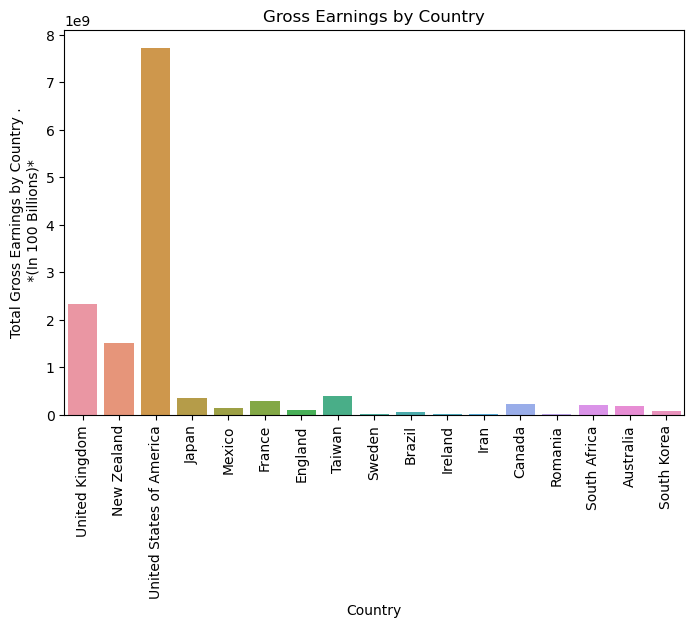

In [14]:
plot.figure(figsize=(8,5))

sns.barplot(data=df, x='Country', y='TotalGross')

plot.title('Gross Earnings by Country')
plot.xlabel('Country')
plot.ylabel('Total Gross Earnings by Country .\n *(In 100 Billions)*')
plot.xticks(rotation=90)
plot.show()

- This bar chart shows that the United States of America grossed the highest, just shy of hitting 800 billion in revenue. 
- Although being the highest grossing, it does not necessarily indicate that directors from the U.S. dominate the industry. This result mostly reflects the size and global reach of Hollywood rather than the superiority of its directors.

**Which Birth Year of Directors Made The Most Money?**

- Data Pull

In [3]:
query = """ SELECT YEAR(director.DirectorBDate) AS birth_year, SUM(movie.Gross) as Movie_Grossing
            FROM director
            INNER JOIN movie_director ON director.Director_ID = movie_director.Director_ID
            INNER JOIN movie ON movie_director.Movie_ID = movie.Movie_ID
            GROUP BY birth_year"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Years', 'TotalGross'])

- Chart Configuration

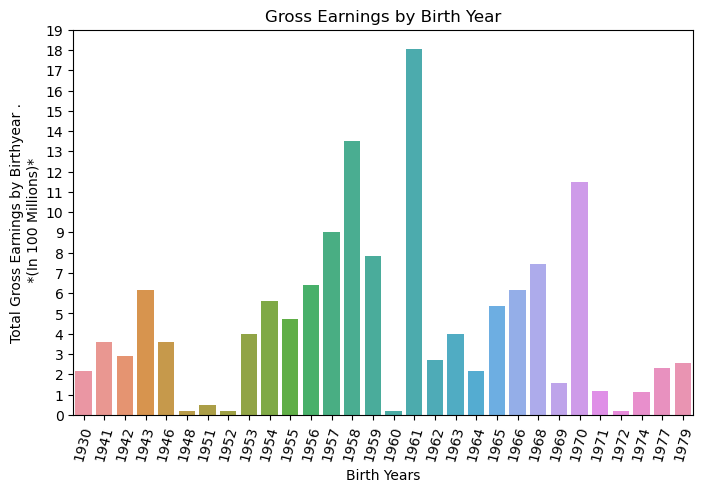

In [4]:
plot.figure(figsize=(8,5))

sns.barplot(data=df, x='Years', y='TotalGross')

plot.title('Gross Earnings by Birth Year')
plot.xlabel('Birth Years')
plot.ylabel('Total Gross Earnings by Birthyear .\n *(In 100 Millions)*')

plot.ylim(0, df['TotalGross'].max() * 1)
yticks = range(0, int(df['TotalGross'].max()) + 100000000, 100000000) 
plot.yticks(yticks, [f'{int(y / 100000000)}' for y in yticks])

df['Years'] = df['Years'].round(0).astype(int)

plot.xticks( rotation=75)
plot.show()

- Of all the birth years of Directors, those born in 1961 were apart of the highest grossing group

**What Birth Year of Directors Produced the Most Amount of 'R'-Rated Movies?**

- Data Pull

In [5]:
query = """ SELECT YEAR(Director.DirectorBDate) as birth_year, COUNT(Movie_ContentRatings.Content_Rating) as Num_Ratings
            FROM director
            INNER JOIN movie_director ON director.Director_ID = movie_director.Director_ID
            INNER JOIN movie_contentratings ON movie_director.Movie_ID = Movie_ContentRatings.Movie_ID
            INNER JOIN contentratings ON movie_contentratings.Content_Rating = ContentRatings.Cr_ID
            WHERE movie_contentratings.Content_Rating = 2
            GROUP BY birth_year"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['BirthYears', 'R.Count'])

- Chart Configuration

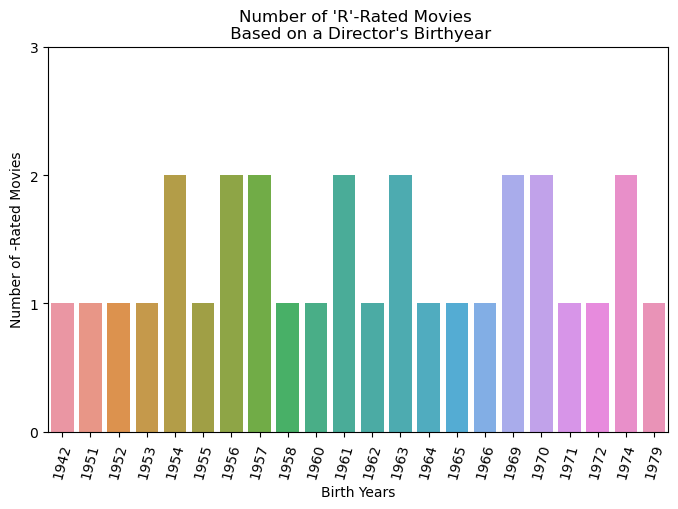

In [6]:
plot.figure(figsize=(8,5))

sns.barplot(data=df, x='BirthYears', y='R.Count')

plot.title("Number of 'R'-Rated Movies \n Based on a Director's Birthyear")
plot.xlabel('Birth Years')
plot.ylabel('Number of 'R'-Rated Movies')

plot.ylim(0, df['R.Count'].max()+1)
yticks = range(df['R.Count'].max()+2)
plot.yticks(yticks, [f'{int(y / 1)}' for y in yticks])

df['BirthYears'] = df['BirthYears'].round(0).astype(int)

plot.xticks( rotation=75)
plot.show()

- This chart shows which director birth years produced the most 'R' movies and '54, '56, '57, '61, '63, '69, '70, '74 are the highest. Seems that R-rated productions are **cross-generational**!

**Which Release Year Garnered The Highest Audience Movie Ratings?**

- Data Pull

In [7]:
query = """ SELECT year(movie.ReleaseDate) as release_year , round(avg(rating.AudienceRating)) as Audience_Rating
            FROM movie
            INNER JOIN rating ON movie.Movie_ID = rating.Movie_ID
            GROUP BY release_year"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['RelYear', 'AudRating'])

- Chart Configuration

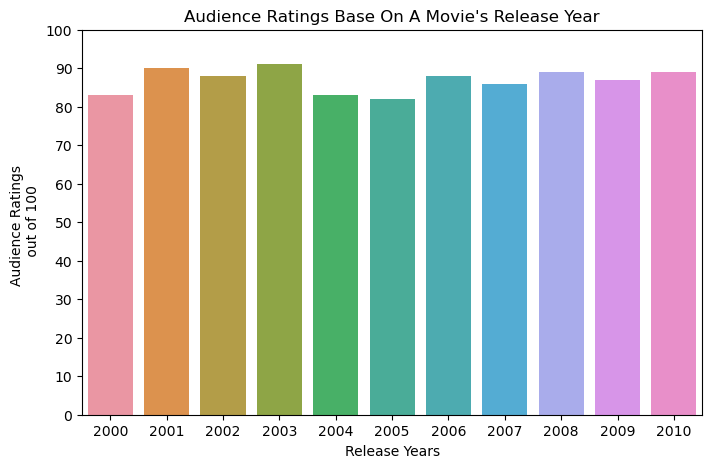

In [8]:
plot.figure(figsize=(8,5))

sns.barplot(data=df, x='RelYear', y='AudRating')

plot.title("Audience Ratings Base On A Movie's Release Year")
plot.xlabel('Release Years')
plot.ylabel('Audience Ratings \n out of 100')

plot.ylim(0, 100)
yticks = range(0,101,10)
plot.yticks(yticks)
plot.xticks
plot.show()

- This chart shows the Audience's ratings based upon the stretch of the 2010's. Overall, these movies were very well accepted by the public!

**Movies and Their Directors**

In [9]:
query = ("""SELECT Movie.Movie_id, Movie.Title, Director.DirectorFName, Director.DirectorLName
            FROM Movie
            INNER JOIN Movie_Director ON movie.movie_id = movie_director.movie_id
            INNER JOIN Director ON Movie_Director.director_id = Director.director_id;
            """)



cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)

    
for row in data:
    print(f'Movie_ID: {row[0]}')
    print(f'Title: {row[1]}')
    print(f'Director First Name: {row[2]}')
    print(f'Director Last Name: {row[3]}\n')

Movie_ID: 1
Title: The Dark Knight
Director First Name: Christopher
Director Last Name: Nolan

Movie_ID: 2
Title: The Lord of the Rings: The Fellowship of the Ring
Director First Name: Peter
Director Last Name: Jackson

Movie_ID: 3
Title: Lost in Translation
Director First Name: Sofia
Director Last Name: Coppola

Movie_ID: 4
Title: Spirited Away
Director First Name: Hayao
Director Last Name: Miyazaki

Movie_ID: 5
Title: Pan's Labyrinth
Director First Name: Guillermo
Director Last Name: del Toro

Movie_ID: 6
Title: Eternal Sunshine of the Spotless Mind
Director First Name: Michel
Director Last Name: Gondry

Movie_ID: 7
Title: Children of Men
Director First Name: Alfonso
Director Last Name: Cuaron

Movie_ID: 8
Title: No Country for Old Men
Director First Name: Ethan
Director Last Name: Coen

Movie_ID: 8
Title: No Country for Old Men
Director First Name: Joel
Director Last Name: Coen

Movie_ID: 9
Title: Shaun of the Dead
Director First Name: Edgar
Director Last Name: Wright

Movie_ID: 10


- This data pull shows all the movies in the database and shows their respective ID's, Titles, and their Director's First and Last names

**Movies Whose Director's First Names Start With a 'J'**

In [10]:
query= ('''SELECT Movie.Title, Director.DirectorFName, Director.DirectorLName
        FROM Movie
        INNER JOIN Movie_Director ON movie.movie_id = movie_director.movie_id
        INNER JOIN Director ON Movie_Director.director_id = Director.director_id
        WHERE director.DirectorFName LIKE 'J%'
        ''')

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)

    
for row in data:
    print(f'Title: {row[0]}')
    print(f'Director First Name: {row[1]}')
    print(f'Director Last Name: {row[2]}\n')


Title: Man On Wire
Director First Name: James
Director Last Name: Marsh

Title: Napoleon Dynamite
Director First Name: Jared
Director Last Name: Hess

Title: Little Miss Sunshine
Director First Name: Jonathan
Director Last Name: Dayton

Title: Amelie
Director First Name: Jean-Pierre
Director Last Name: Jeunet

Title: Juno
Director First Name: Jason
Director Last Name: Reitman

Title: A Prophet
Director First Name: Jacques
Director Last Name: Audiard

Title: Once
Director First Name: John
Director Last Name: Carney

Title: Iron Man
Director First Name: Jon
Director Last Name: Favreau

Title: No Country for Old Men
Director First Name: Joel
Director Last Name: Coen



- This data pull shows all the movies in the database whose Director's First name starts with the letter 'J' and shows their respective Titles